In [18]:
import numpy as np
import pandas as pd 

from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn import linear_model

from sklearn.feature_extraction.text import TfidfTransformer 

from sklearn.cross_validation import KFold 
from sklearn.metrics import mean_squared_error 

import matplotlib.pyplot as plt 
import seaborn as sns 

from scipy.stats import norm

% matplotlib inline

In [2]:
# Loading dataset 

In [3]:
df_train  = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Features 
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
df_train.shape

(550068, 12)

In [10]:
df_train.isnull().sum().sort_values(ascending = False)

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

## Purchase 

In [11]:
df_train['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

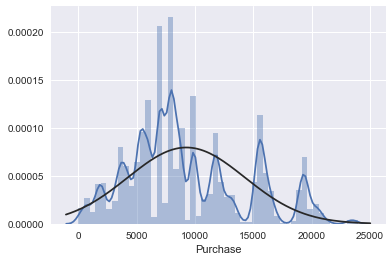

In [46]:
# Plot 
df_purchase1 = df_train['Purchase']
df_purchase2 =((df_purchase1 - df_purchase.mean()) / df_purchase.std())
sns.distplot(df_purchase2, fit = norm)

In [22]:
print("Skewness : ", df_train['Purchase'].skew())
print("Kurtosis : ", df_train['Purchase'].kurt())

Skewness :  0.600140003709
Kurtosis :  -0.338377565585


## Data Corelation

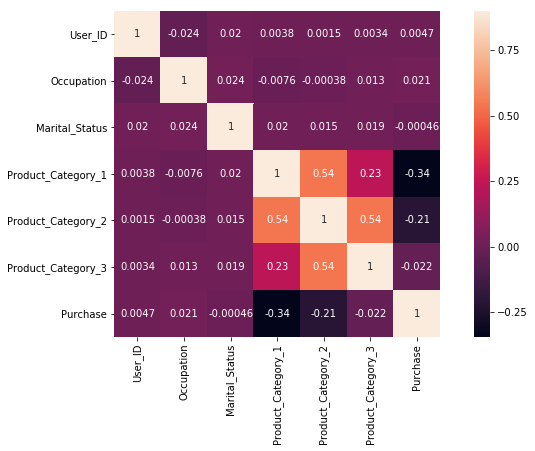

In [29]:
data_corr = df_train.corr()
plt.subplots(figsize = (12, 6))
sns.heatmap(data_corr, vmax = 0.9, square = True, annot= True)
plt.savefig("Plots/Data_Correlation_Heatmap.png")
plt.show()

In [37]:
#Scatter plots 
#sns.set()
#cols = ['Purchase','Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
#sns.pairplot(df_train[cols], size = 2.5)
#plt.show()